<a href="https://colab.research.google.com/github/albertopolini/Advanced-Machine-Learning/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning

### AutoEncoders  

An autoencoder, is an artificial neural network used for learning efficient codings. 

The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. 

<img src="https://miro.medium.com/max/3148/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" width="65%">

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.

### Reference

Based on [https://blog.keras.io/building-autoencoders-in-keras.html](https://blog.keras.io/building-autoencoders-in-keras.html)

## Introducing _Keras Functional API_

The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

All the Functional API relies on the fact that each `keras.Layer` object is a _callable_ object!

---

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import fashion_mnist

import numpy as np

In [2]:
(x_train, _), (x_val, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))

4431872/4422102 [==============================] - 0s 0us/step


In [15]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='linear')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

The "power" of the functional api -- create **submodels**

In [16]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [23]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [24]:
autoencoder.compile(optimizer='adam', loss='mse', metrics = ["mse"])
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [25]:
#note: x_train, x_train :) 
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/100
30/30 [==============================] - 1s 34ms/step - loss: 0.1287 - mse: 0.1287 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 2/100
30/30 [==============================] - 1s 31ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 3/100
30/30 [==============================] - 1s 30ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 4/100
30/30 [==============================] - 1s 30ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 5/100
30/30 [==============================] - 1s 31ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 6/100
30/30 [==============================] - 1s 30ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 7/100
30/30 [==============================] - 1s 30ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 8/100
30/30 [==============================] - 1s 30ms/step - loss: 0.

### Testing the Autoencoder 

In [26]:
from matplotlib import pyplot as plt

%matplotlib inline

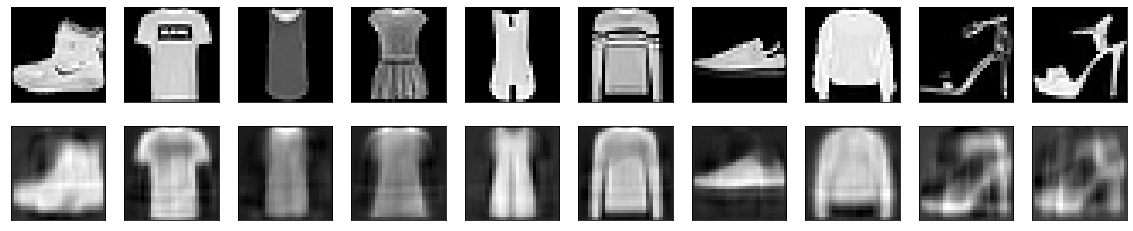

In [27]:
x_selected = x_train
encoded_imgs = encoder.predict(x_selected)
decoded_imgs = decoder.predict(encoded_imgs)
#alternative here?

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_selected[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Sample generation with Autoencoder 

One of the powerful tools of auto-encoders is using the encoder to generate meaningful representation from the feature vectors.

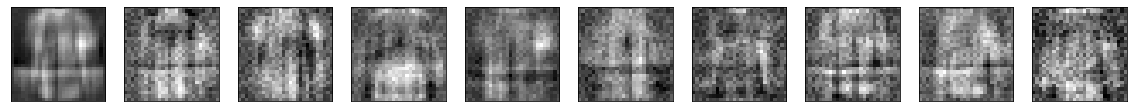

In [28]:
encoded_imgs = np.random.rand(10,32)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # generation
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Your turn
Now define an autoencoder with two different layers, where each layer has a compression of factor of (around) 3. Investigate the representation of the code layer and plot it for the first 10 validation examples. 
